![title](hw_img/hw6.jpg)

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)
x = np.linspace(-1, 1, 200)
noise = np.random.normal(0, 0.1, 200)
y = 2 +  x + 2 * np.power(x, 2) + noise

x_train = x[0:160]
y_train = y[0:160]

x_test = x[160:]
y_test = y[160:]

In [4]:
def calculate_H(data, degree):
    H = np.column_stack([np.power(data, i) for i in range(0, degree+1)])
    return H
    
def calculate_A(H, data, lamda):
    HH = np.dot(np.transpose(H), H)
    temp = inv(HH + lamda * np.identity(HH.shape[0]))
    A = np.dot(np.dot(temp, np.transpose(H)), data)
    return A

def calculate_HA(H, A):
    HA = np.dot(H, A)
    return HA

def calculate_error(data, HA):
    error = np.sqrt(np.sum(np.dot(np.transpose(data - HA), data - HA)))
    return error

def summary_data(degree,lamda):
    H_train = calculate_H(x_train, degree)
    H_test = calculate_H(x_test, degree)

    A = calculate_A(H_train, y_train, lamda)

    HA_train = calculate_HA(H_train, A)
    HA_test = calculate_HA(H_test, A)

    summary_data.error_train = calculate_error(y_train, HA_train)
    summary_data.error_test = calculate_error(y_test, HA_test)
    

[1.1159683993056755, 1.1292374895115158, 1.1380414340977902, 1.147021862602357, 1.1569290116053597, 1.1678331961309647, 1.1796522755762635, 1.1922708913233697, 1.2055734986991493, 1.2194540086613963, 1.2338180981322844, 1.2485830628738865, 1.263676864777761, 1.279036971467427, 1.2946092093724315, 1.3103467084186262, 1.3262089602940825, 1.342160990100901, 1.3581726328993524, 1.3742179040919136]
[2.062021303064212, 0.8078533516098724, 1.0351899021956825, 1.0430040340928197, 0.9852052591168673, 0.9120622191436849, 0.8451057472883131, 0.7958136506232523, 0.7705321702761275, 0.7714725252526788, 0.7971418006630359, 0.8435199290195022, 0.9056896386682649, 0.9790791618218608, 1.0600053956992066, 1.1457233563794682, 1.2342686328094568, 1.3242629562254769, 1.4147480165074768, 1.5050605476322538]


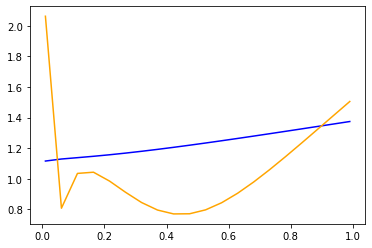

In [5]:
error_train = []
error_test = []

lamdas = np.linspace(0.01,0.99,20)
for i in lamdas:
    summary_data(50, i)
    error_train.append(summary_data.error_train)
    error_test.append(summary_data.error_test)

print(error_train)
print(error_test)

plt.plot(lamdas, error_train, 'b')
plt.plot(lamdas, error_test, 'orange')